In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import IsolationForest
from lightgbm import LGBMClassifier
from boruta import BorutaPy
from sklearn.pipeline import Pipeline

In [2]:
# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

In [3]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [4]:
# Instantiate the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [5]:
# Apply SMOTE to your dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [6]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [7]:
# Define the classifiers and SelectKBest as a preprocessing step
models = {
    "SelectKBest_RF": Pipeline([
        ('feature_selection', SelectKBest(k=15)),  # Adjust k as needed
        ('classification', RandomForestClassifier())
    ]),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(),
    "LightGBM": LGBMClassifier(),
    "Random Forest": RandomForestClassifier(),
    "CART": DecisionTreeClassifier(),
     "K-Nearest Neighbors": KNeighborsClassifier()
   
    
}


In [8]:
# Specify the positive class label
positive_class = 20  # Replace with the positive class in your dataset (e.g., 10 or 20)

In [12]:
# Initialize arrays to store ROC curve data
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

for model_name, model in models.items():
    
        # Map class labels to 0 and 1 for both training and testing sets
        y_train_binary = (y_train == positive_class).astype(int)
        y_test_binary = (y_test == positive_class).astype(int)

        model.fit(X_train, y_train_binary)
        y_pred = model.predict_proba(X_test)[:, 1]

        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test_binary, y_pred)
        roc_auc = auc(fpr, tpr)

        # Store ROC curve data
        fpr_dict[model_name] = fpr
        tpr_dict[model_name] = tpr
        roc_auc_dict[model_name] = roc_auc


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 3108, number of negative: 3126
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 6234, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498556 -> initscore=-0.005775
[LightGBM] [Info] Start training from score -0.005775


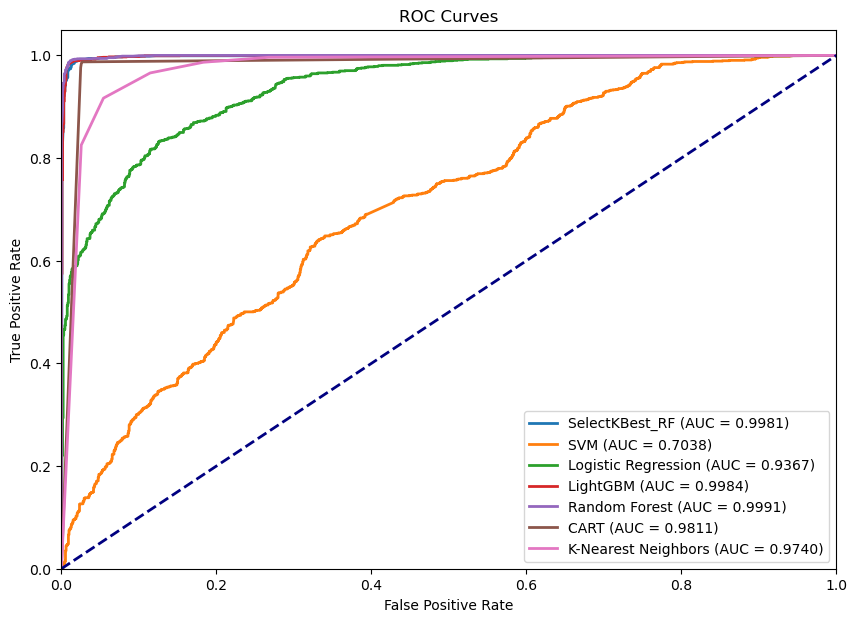

In [13]:
# Plot all ROC curves in a single plot
plt.figure(figsize=(10, 7))

for model_name in models.keys():
    fpr = fpr_dict[model_name]
    tpr = tpr_dict[model_name]
    roc_auc = roc_auc_dict[model_name]
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.4f})')  # Display AUC with more decimal places

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/ROC CURVE/ROC CURVE.svg", format='svg')
plt.show()

In [ ]:
# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/ROC CURVE/ROC CURVE.svg", format='svg')
